0.015987697474915404


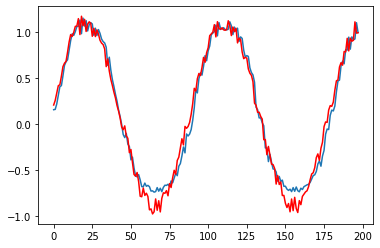

In [78]:
from pandas import DataFrame
from pandas import concat
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from matplotlib.pyplot import plot
from math import sin,pi,cos
from numpy import exp
from random import random
# create sequence
length = 200
sequence = [sin(pi*i/45)+.2*random() for i in range(1,length)]
# create X/y pairs
df = DataFrame(sequence)
df = concat([df.shift(1), df], axis=1)
df.dropna(inplace=True)
# convert to LSTM friendly format
values = df.values
X, y = values[:, 0], values[:, 1]
X = X.reshape(len(X), 1, 1)
# 1. define network
model = Sequential()
model.add(LSTM(5, input_shape=(1,1)))
model.add(Dense(1))
# 2. compile network
model.compile(optimizer='adam', loss='mean_squared_error')
# 3. fit network
history = model.fit(X[:int(length*.7)], y[:int(length*.7)], epochs=1000, batch_size=len(X), verbose=0)
# 4. evaluate network
loss = model.evaluate(X[int(length*.7):], y[int(length*.7):], verbose=0)
print(loss)
# 5. make predictions
predictions = model.predict(X, verbose=0)
plot(predictions[:, 0])
plot(y,'r')
